# GTZAN_Dataset_EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
import librosa, IPython
import librosa.display as lplt
seed = 12
np.random.seed(seed)

In [2]:
df = pd.read_csv('GTZAN_dataset/features_3_sec.csv')
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [3]:
print('Dataset shape : ',df.shape)
print("장르별 카운트 :")
df.label.value_counts().reset_index()

Dataset shape :  (9990, 60)
장르별 카운트 :


label  count
0      blues   1000
1       jazz   1000
2      metal   1000
3        pop   1000
4     reggae   1000
5      disco    999
6  classical    998
7     hiphop    998
8       rock    998
9    country    997

In [4]:
# librosa에 오디오파일 로드해보기

audio_fp = 'GTZAN_dataset/genres_original/blues/blues.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)

In [5]:
IPython.display.Audio(audio_data, rate=sr)

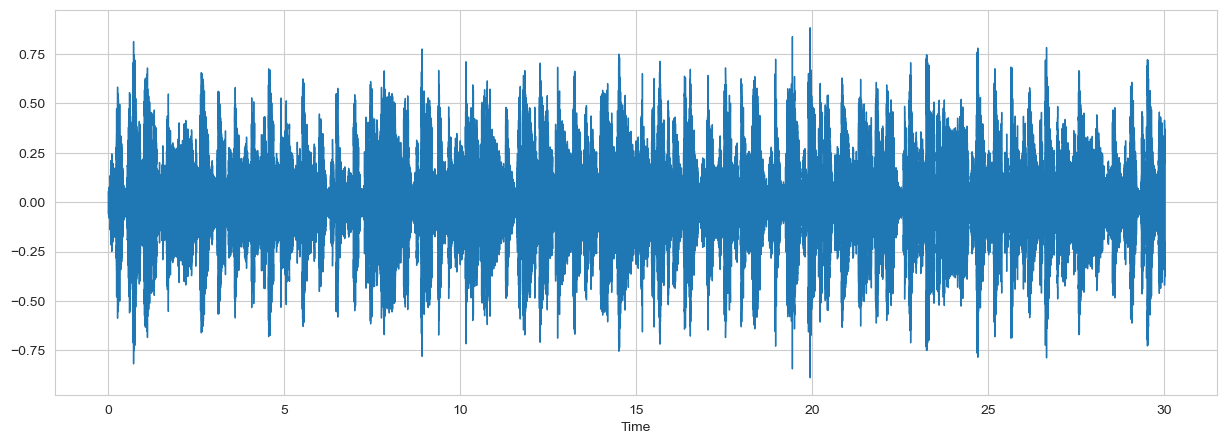

In [6]:
# waveshow로 파형 확인

plt.figure(figsize=(15,5))
lplt.waveshow(audio_data)
plt.show()

### Fourier Transform
시간에 따른 신호의 변화를, 주파수의 관점으로 표현(변환)한 것. 
그래프에서,  X축을 시간에서 주파수로 바꿨다고 생각하면 됨.
 
### Discrete Fourier Transform
퓨리에 변환의 결과가 이산값(Dicrete)하게 만드는 것이 특징.
우리가 실제로 컴퓨터에 활용할 신호는 양자환된 Dicrete신호이므로, DFT가 필요하다.
 
### Fast Fourier Transform
DFT를 빠르게 계산하는 하나의 알고리즘.
내츄럴한 DFT는 계산량이 많다. (DFT의 복잡도는 O(N*N)이다.)
더 간단히 할 수 있는 방법이 FFT이고, FFT의 복잡도는 (N/2)logN 으로 줄어들 수 있다.
가장 일반적으로 사용되는 알고리즘은 쿨리-튜키 알고리즘이다.
(단, N=2의 지수승일 때만 가능- 2, 4, 32 등..)
 
### STFT (Short Time Fourier Transform)
어떤 (음성) 신호에 대해 FFT를 적용하는데, 일정한 시간 단위로 끊어서 적용하는 것.
즉, FFT를 쓰지만 시간의 개념이 추가된다. (아래 참고)
 
### Spectrogram
STFT는 FFT에서 가지고 있는 변수인 '주파수', '크기(진폭)'에 '시간'을 더한 것이라고 하였다.
이 STFT의 3차원 변수를 2차원으로 표현한 시각화 도구가 Spectrogram이다.
x축, y축은 주파수와 시간을 나타내고, 크기(진폭)은 색깔로써 표현한다.
 
### Window Size
STFT를 실행할때, 일정 시간 단위로 끊어서 FFT를 적용한다고 하였다.
Window Size란, 바로 그 일정 시간의 크기를 의미한다.
Window Size를 적용할때, 주로 오버랩(겹치게 하기)을 적용한다.

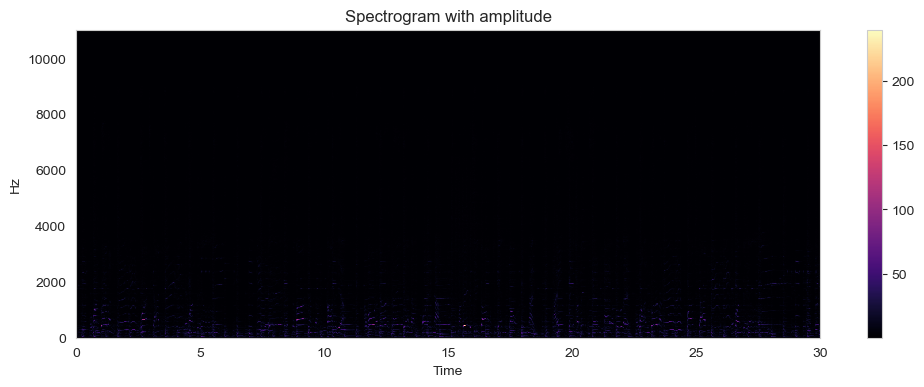

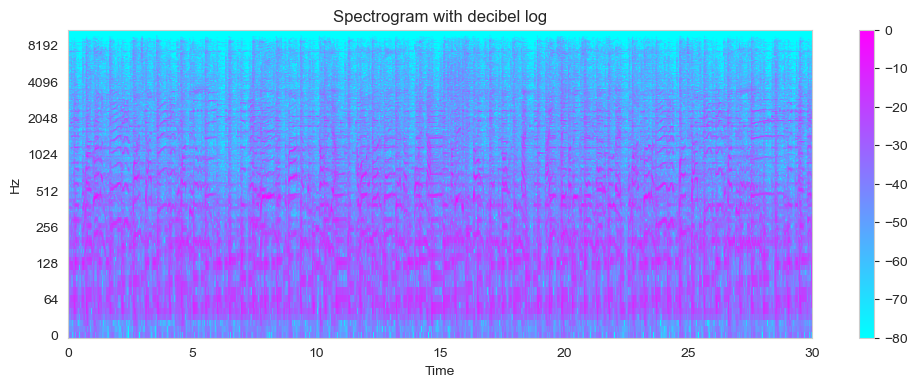

In [7]:
# STFT(Short Time Fourier Transform)

n_fft = 2048 # window size
hop_length = 512 # window hop length for STFT

stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)

plt.figure(figsize=(12,4))
lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectrogram with amplitude")
plt.show()

plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()

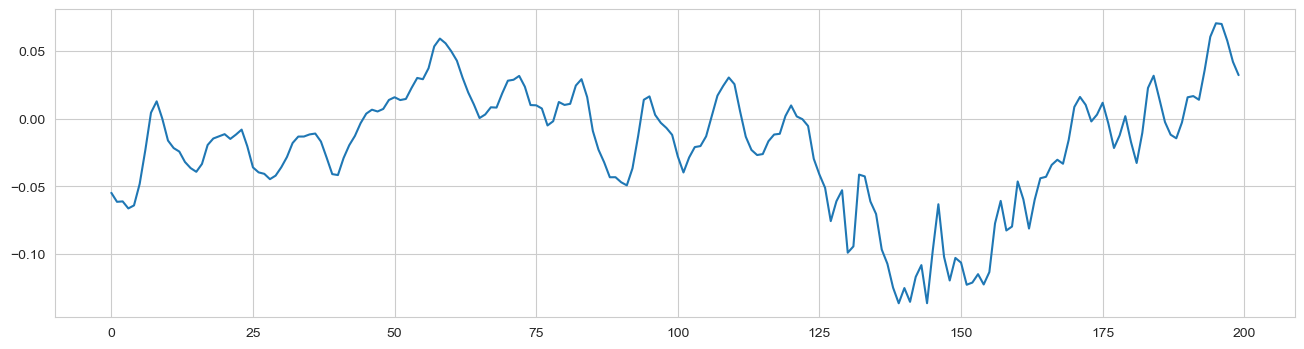

In [8]:
start = 1000
end = 1200
plt.figure(figsize=(16,4))
plt.plot(audio_data[start:end])
plt.show()

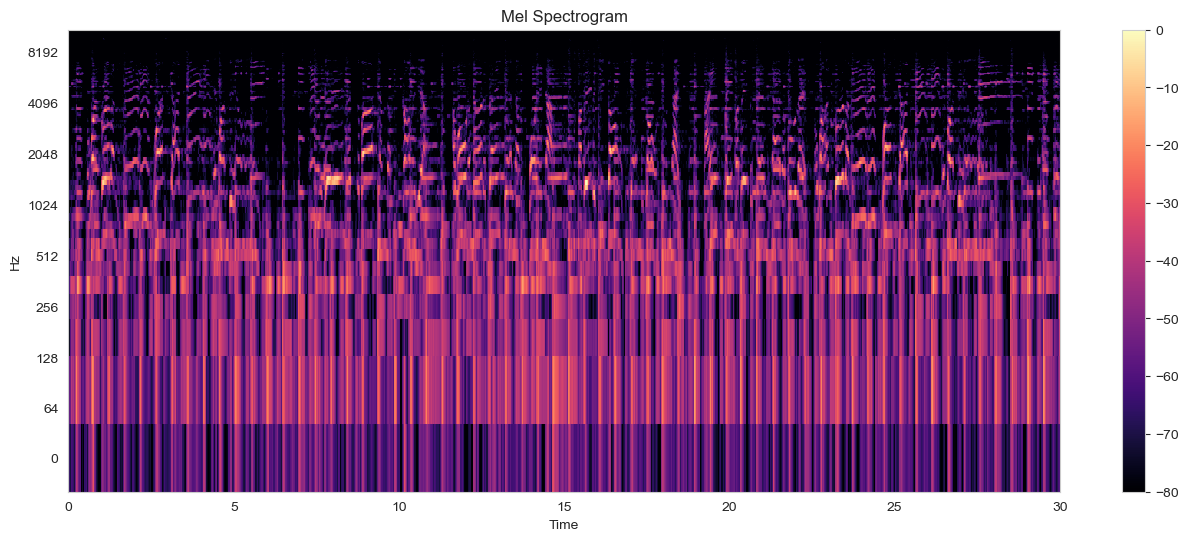

In [12]:
# Mel Spectrogram 확인

mel_spec = librosa.feature.melspectrogram(y=audio_data,sr=sr)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(16,6))
lplt.specshow(mel_spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()

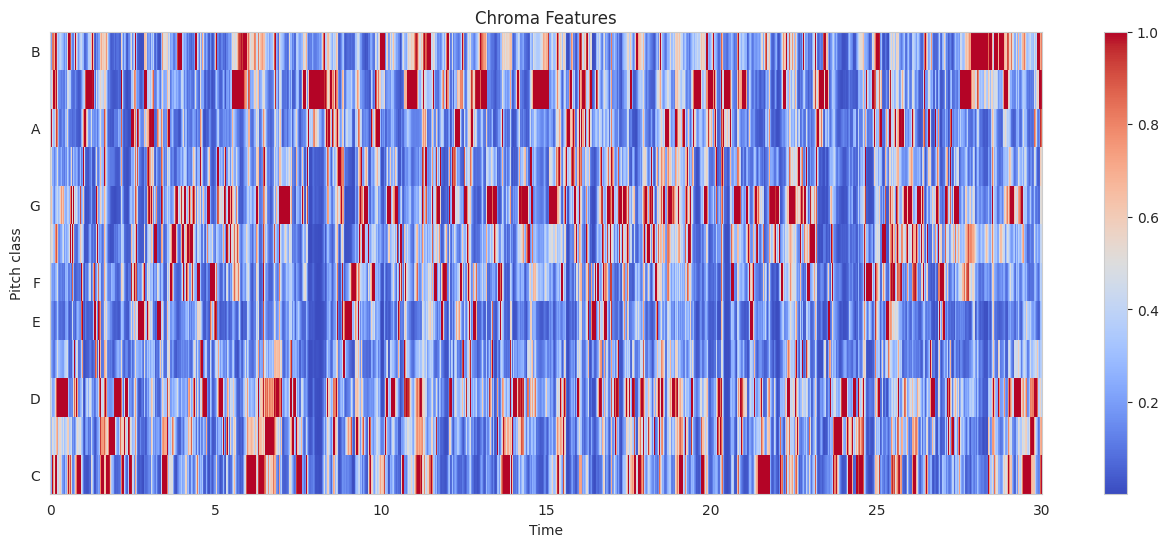

In [ ]:
# Chroma Features 확인

chroma = librosa.feature.chroma_stft(y=audio_data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

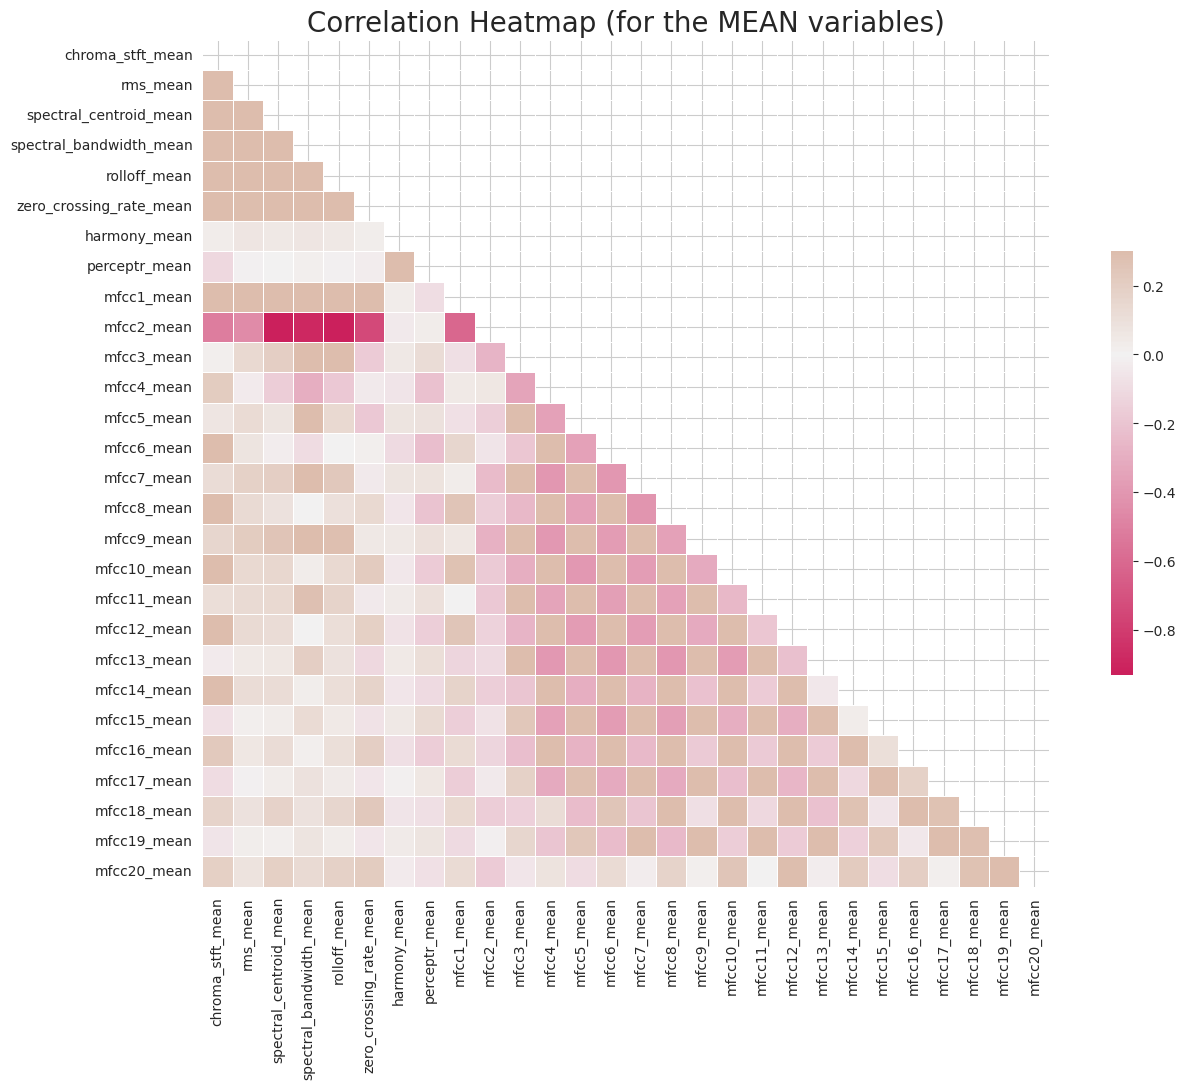

In [ ]:
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype='bool'))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

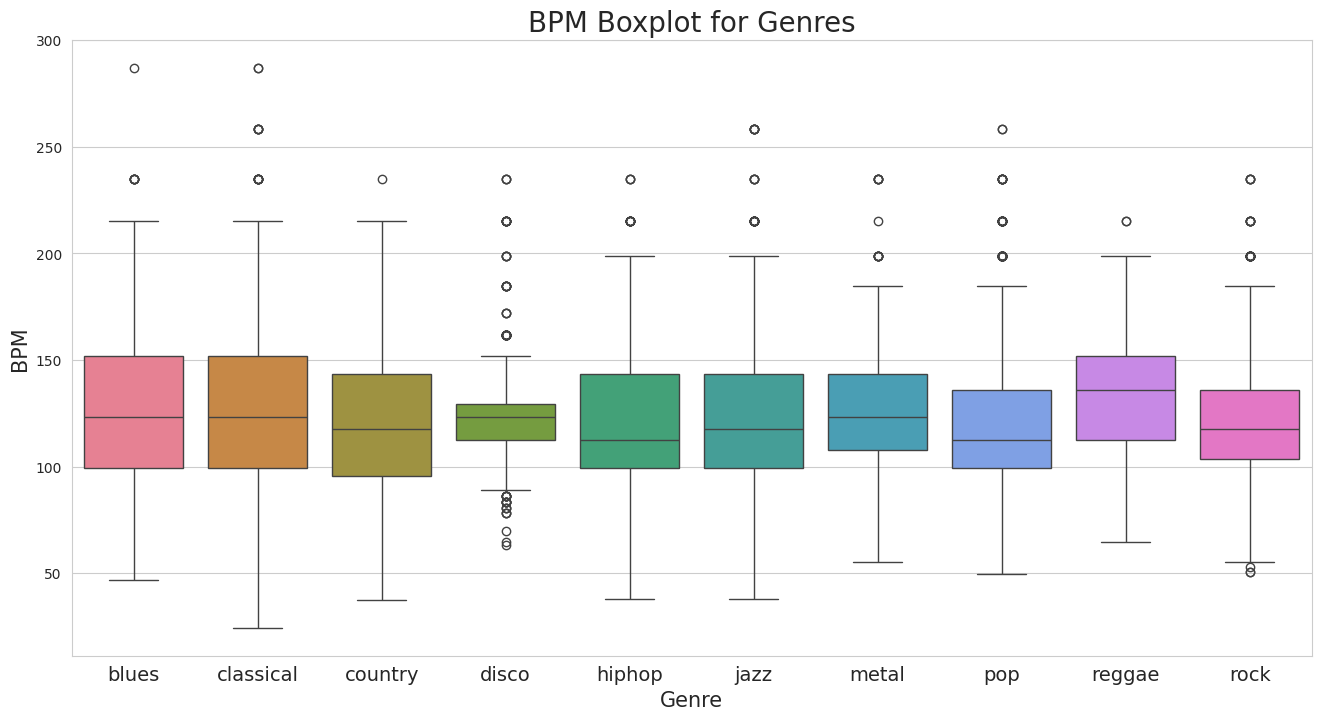

In [ ]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

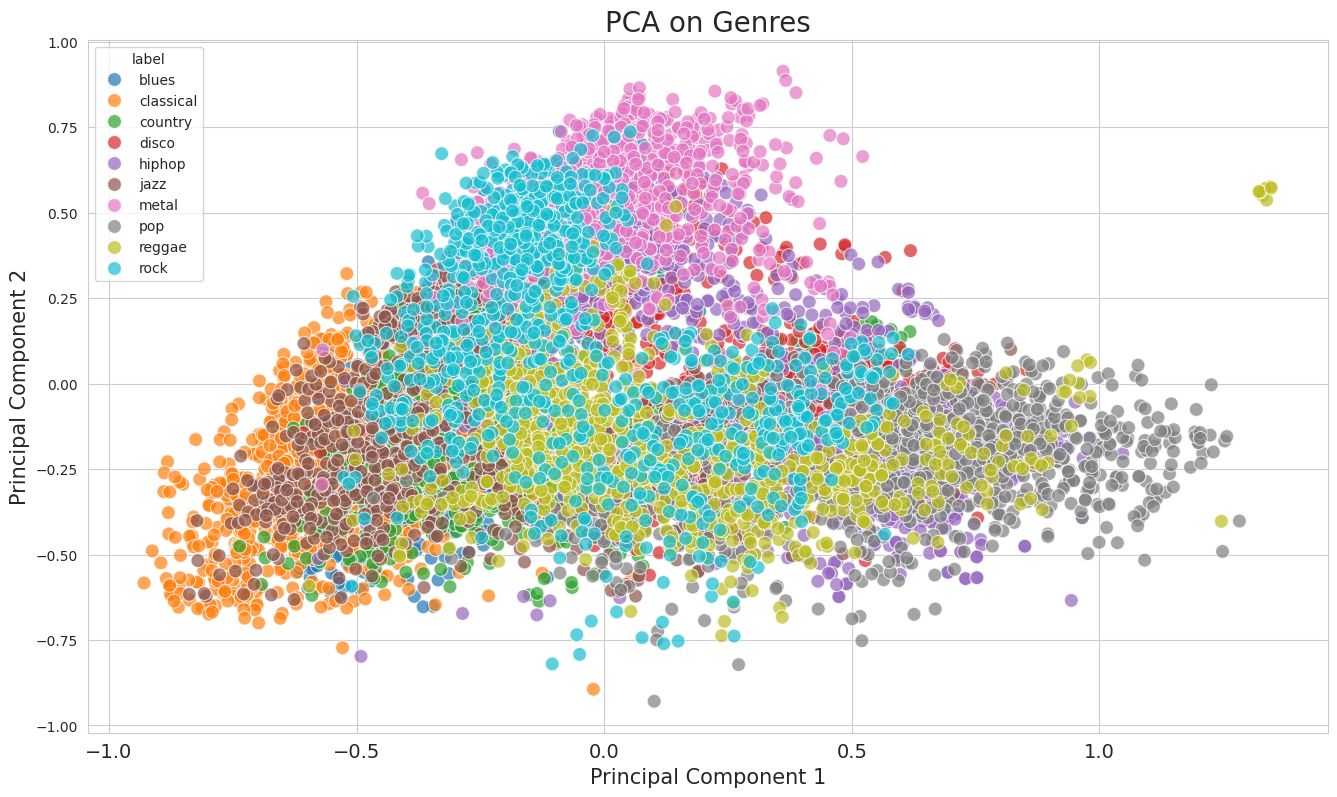

In [ ]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

# Data Preparation

In [ ]:
# find all columns with any NA values
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


In [ ]:
# map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(df.label.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


In [ ]:
# update labels in df to index
df.label = [label_index[l] for l in df.label]

# Split Train, Dev & Test Sets

In [ ]:
# shuffle samples
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [ ]:
# remove irrelevant columns
df_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
df_y = df_shuffle.pop('label')
df_X = df_shuffle

# split into train dev and test
X_train, df_test_valid_X, y_train, df_test_valid_y = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed, stratify=df_y)
X_dev, X_test, y_dev, y_test = skms.train_test_split(df_test_valid_X, df_test_valid_y, train_size=0.66, random_state=seed, stratify=df_test_valid_y)

In [ ]:
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Dev set has {X_dev.shape[0]} records out of {len(df_shuffle)} which is {round(X_dev.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 6993 records out of 9990 which is 70%
Dev set has 1978 records out of 9990 which is 20%
Test set has 1019 records out of 9990 which is 10%


In [ ]:
print(y_train.value_counts()[0]/y_train.shape[0]*100)
print(y_dev.value_counts()[0]/y_dev.shape[0]*100)
print(y_test.value_counts()[0]/y_test.shape[0]*100)

10.01001001001001
10.010111223458038
10.009813542688912


In [ ]:
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [ ]:
import tensorflow as tf
print("TF version:-", tf.__version__)
import keras as k
tf.random.set_seed(seed)

TF version:- 2.17.0


In [ ]:
ACCURACY_THRESHOLD = 0.94

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

def trainModel(model, epochs, optimizer):
    batch_size = 128
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
    )
    return model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=epochs,
                     batch_size=batch_size, callbacks=[callback])

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [ ]:
model_1 = k.models.Sequential([
    k.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(10, activation='softmax'),
])
print(model_1.summary())
model_1_history = trainModel(model=model_1, epochs=70, optimizer='adam')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          14,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,650 (221.29 KB)

 Trainable params: 56,650 (221.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3630 - loss: 1.8292 - val_accuracy: 0.6314 - val_loss: 1.0627
Epoch 2/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6776 - loss: 0.9518 - val_accuracy: 0.7154 - val_loss: 0.8200
Epoch 3/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7579 - loss: 0.7282 - val_accuracy: 0.7568 - val_loss: 0.7091
Epoch 4/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7953 - loss: 0.6090 - val_accuracy: 0.7836 - val_loss: 0.6377
Epoch 5/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8228 - loss: 0.5202 - val_accuracy: 0.7988 - val_loss: 0.5920
Epoch 6/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8456 - loss: 0.4514 - val_accuracy: 0.8074 - val_loss: 0.5656
Epoch 7/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8710 - loss: 0.3941 - val_accuracy: 0.8195 - val_loss: 0.5434
Epoch 8/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8928 - loss: 0.3432 - val_accuracy: 0.8286 - val_

Max. Validation Accuracy 0.8978766202926636


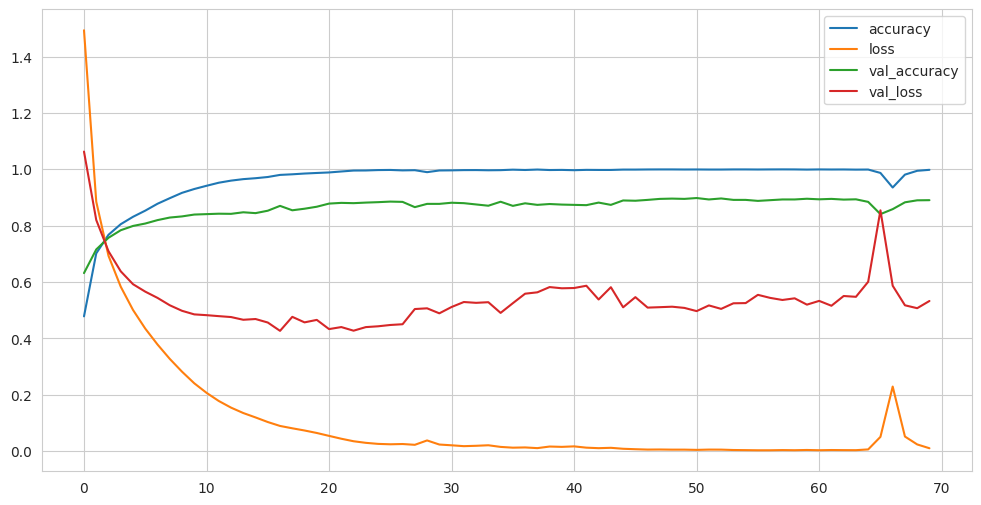

In [ ]:
plotHistory(model_1_history)

In [ ]:
model_2 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(10, activation='softmax'),
])
print(model_2.summary())
model_2_history = trainModel(model=model_2, epochs=100, optimizer='adam')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │          29,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 202,826 (792.29 KB)

 Trainable params: 202,826 (792.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2916 - loss: 1.9647 - val_accuracy: 0.6239 - val_loss: 1.1031
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5845 - loss: 1.1956 - val_accuracy: 0.6951 - val_loss: 0.8592
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6767 - loss: 0.9643 - val_accuracy: 0.7275 - val_loss: 0.7603
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7246 - loss: 0.8361 - val_accuracy: 0.7816 - val_loss: 0.6504
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7550 - loss: 0.7046 - val_accuracy: 0.7983 - val_loss: 0.5903
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7876 - loss: 0.6313 - val_accuracy: 0.8190 - val_loss: 0.5503
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8104 - loss: 0.5683 - val_accuracy: 0.8251 - val_loss: 0.5257
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8317 - loss: 0.5146 - val_accurac

Max. Validation Accuracy 0.9271991848945618


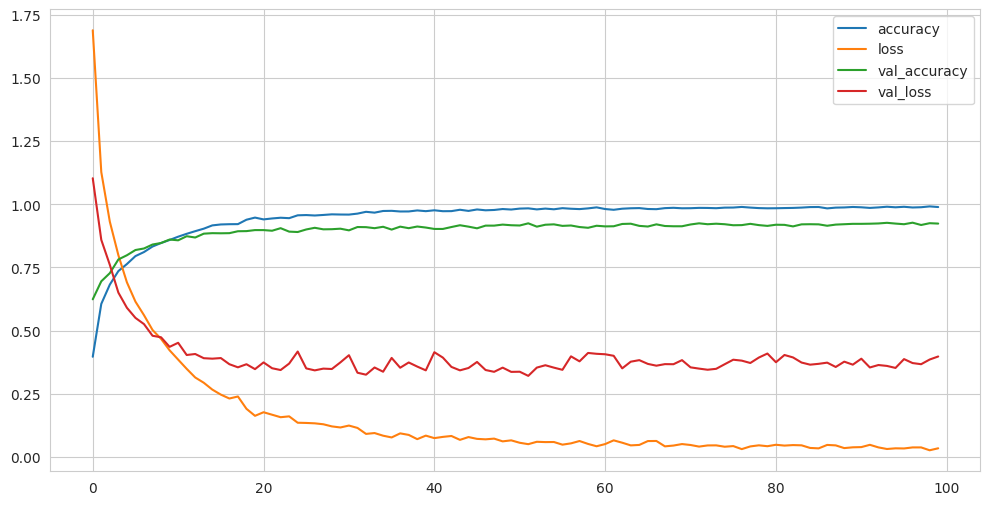

In [ ]:
plotHistory(model_2_history)

In [ ]:
model_3 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(10, activation='softmax'),
])
print(model_3.summary())
model_3_history = trainModel(model=model_3, epochs=700, optimizer='sgd')

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 512)                 │          29,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 202,826 (792.29 KB)

 Trainable params: 202,826 (792.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/700
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1397 - loss: 2.2847 - val_accuracy: 0.3210 - val_loss: 2.1738
Epoch 2/700
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2318 - loss: 2.1837 - val_accuracy: 0.3504 - val_loss: 2.0501
Epoch 3/700
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3025 - loss: 2.0761 - val_accuracy: 0.3605 - val_loss: 1.9081
Epoch 4/700
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3259 - loss: 1.9516 - val_accuracy: 0.3832 - val_loss: 1.7732
Epoch 5/700
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3729 - loss: 1.8387 - val_accuracy: 0.4050 - val_loss: 1.6656
Epoch 6/700
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3680 - loss: 1.7571 - val_accuracy: 0.4398 - val_loss: 1.5823
Epoch 7/700
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3937 - loss: 1.6814 - val_accuracy: 0.4722 - val_loss: 1.5145
Epoch 8/700
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4185 - loss: 1.6185 - val_accuracy:

Max. Validation Accuracy 0.9246714115142822


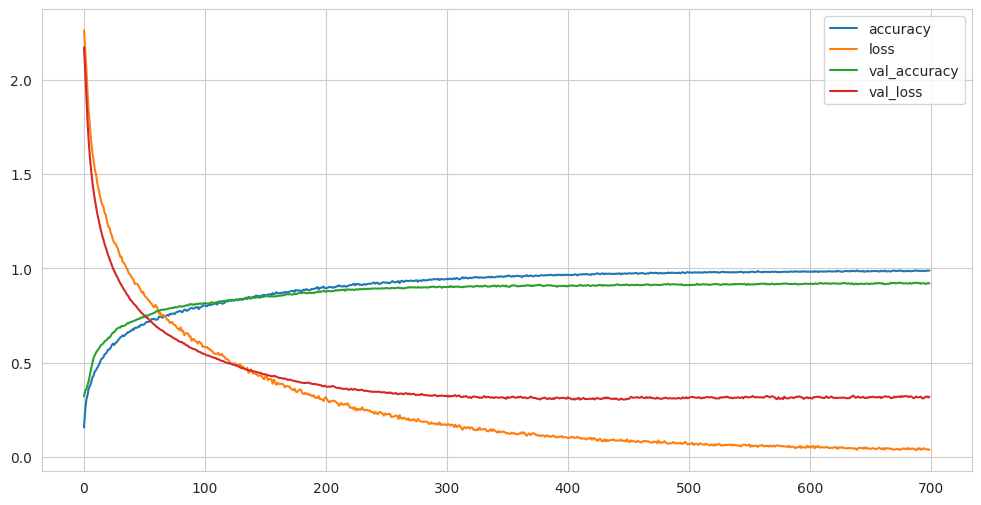

In [ ]:
plotHistory(model_3_history)

In [ ]:
model_4 = k.models.Sequential([
    k.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.3),

    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(10, activation='softmax'),
])
print(model_4.summary())
model_4_history = trainModel(model=model_4, epochs=500, optimizer='rmsprop')

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 1024)                │          59,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 757,322 (2.89 MB)

 Trainable params: 757,322 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.3100 - loss: 1.9191 - val_accuracy: 0.5814 - val_loss: 1.2062
Epoch 2/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5445 - loss: 1.3222 - val_accuracy: 0.6744 - val_loss: 0.9507
Epoch 3/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6475 - loss: 1.0712 - val_accuracy: 0.6587 - val_loss: 1.0100
Epoch 4/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6922 - loss: 0.9630 - val_accuracy: 0.7644 - val_loss: 0.7093
Epoch 5/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7282 - loss: 0.8277 - val_accuracy: 0.7851 - val_loss: 0.6696
Epoch 6/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7589 - loss: 0.7648 - val_accuracy: 0.8089 - val_loss: 0.5986
Epoch 7/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7837 - loss: 0.6828 - val_accuracy: 0.8210 - val_loss: 0.5668
Epoch 8/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8035 - loss: 0.6181 - val_accurac

Max. Validation Accuracy 0.9393326640129089


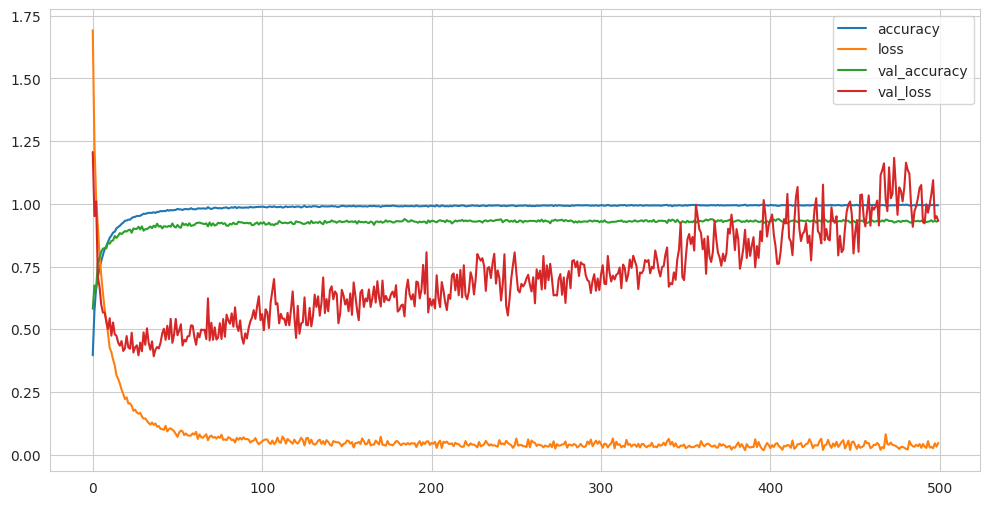

In [ ]:
plotHistory(model_4_history)

In [ ]:
test_loss, test_acc  = model_1.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("\nThe Best test Accuracy is :",test_acc*100)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8716 - loss: 0.6464 
The test Loss is : 0.6418346166610718

The Best test Accuracy is : 87.24239468574524


In [ ]:
test_loss, test_acc  = model_2.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("\nThe Best test Accuracy is :",test_acc*100)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9257 - loss: 0.3458 
The test Loss is : 0.3500096797943115

The Best test Accuracy is : 92.63984560966492


In [ ]:
test_loss, test_acc  = model_3.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("\nThe Best test Accuracy is :",test_acc*100)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9234 - loss: 0.3162 
The test Loss is : 0.3417682349681854

The Best test Accuracy is : 91.46221876144409


In [ ]:
test_loss, test_acc  = model_4.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("\nThe Best test Accuracy is :",test_acc*100)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9428 - loss: 0.8375 
The test Loss is : 0.8922132253646851

The Best test Accuracy is : 93.42492818832397


In [ ]:
import os

# 저장할 모델 경로
model_save_path = '/content/drive/MyDrive/SoundMap/Code/Models'

# 경로가 없으면 생성
if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)

# 모델 학습 후 저장하는 함수
def save_model(model, model_name):
    model.save(os.path.join(model_save_path, model_name))

# 모델 불러오기 함수
def load_model(model_name):
    return tf.keras.models.load_model(os.path.join(model_save_path, model_name))

# 모델 1 학습 및 저장
model_1 = k.models.Sequential([
    k.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(10, activation='softmax'),
])
model_1_history = trainModel(model=model_1, epochs=70, optimizer='adam')
save_model(model_1, 'model_1.h5')  # 모델 1 저장

# 모델 2 학습 및 저장
model_2 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(10, activation='softmax'),
])
model_2_history = trainModel(model=model_2, epochs=100, optimizer='adam')
save_model(model_2, 'model_2.h5')  # 모델 2 저장

# 모델 3 학습 및 저장
model_3 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(10, activation='softmax'),
])
model_3_history = trainModel(model=model_3, epochs=700, optimizer='sgd')
save_model(model_3, 'model_3.h5')  # 모델 3 저장

# 모델 4 학습 및 저장
model_4 = k.models.Sequential([
    k.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.3),
    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.3),
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.3),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),
    k.layers.Dense(10, activation='softmax'),
])
model_4_history = trainModel(model=model_4, epochs=500, optimizer='rmsprop')
save_model(model_4, 'model_4.h5')  # 모델 4 저장

Epoch 1/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3359 - loss: 1.8781 - val_accuracy: 0.6304 - val_loss: 1.0791
Epoch 2/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6754 - loss: 0.9628 - val_accuracy: 0.7042 - val_loss: 0.8309
Epoch 3/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7539 - loss: 0.7376 - val_accuracy: 0.7528 - val_loss: 0.7052
Epoch 4/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7996 - loss: 0.6086 - val_accuracy: 0.7907 - val_loss: 0.6226
Epoch 5/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8320 - loss: 0.5127 - val_accuracy: 0.8043 - val_loss: 0.5665
Epoch 6/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8593 - loss: 0.4350 - val_accuracy: 0.8210 - val_loss: 0.5208
Epoch 7/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8866 - loss: 0.3675 - val_accuracy: 0.8362 - val_loss: 0.4889
Epoch 8/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9058 - loss: 0.3118 - val_accuracy: 0.8448 - val

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3176 - loss: 1.9033 - val_accuracy: 0.6047 - val_loss: 1.1050
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5874 - loss: 1.1704 - val_accuracy: 0.7058 - val_loss: 0.8578
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6764 - loss: 0.9348 - val_accuracy: 0.7391 - val_loss: 0.7467
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7295 - loss: 0.8097 - val_accuracy: 0.7659 - val_loss: 0.6534
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7522 - loss: 0.7204 - val_accuracy: 0.7877 - val_loss: 0.6175
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7782 - loss: 0.6343 - val_accuracy: 0.8104 - val_loss: 0.5482
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7980 - loss: 0.5903 - val_accuracy: 0.8316 - val_loss: 0.4988
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8333 - loss: 0.4945 - val_accuracy: 0.

Epoch 1/700
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1065 - loss: 2.3133 - val_accuracy: 0.2583 - val_loss: 2.2195
Epoch 2/700
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1848 - loss: 2.2318 - val_accuracy: 0.3635 - val_loss: 2.1105
Epoch 3/700
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2703 - loss: 2.1247 - val_accuracy: 0.3463 - val_loss: 1.9769
Epoch 4/700
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3003 - loss: 2.0265 - val_accuracy: 0.3493 - val_loss: 1.8470
Epoch 5/700
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3312 - loss: 1.9033 - val_accuracy: 0.3655 - val_loss: 1.7401
Epoch 6/700
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3484 - loss: 1.8102 - val_accuracy: 0.3999 - val_loss: 1.6522
Epoch 7/700
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3682 - loss: 1.7399 - val_accuracy: 0.4242 - val_loss: 1.5784
Epoch 8/700
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3943 - loss: 1.6944 - val_accuracy: 0.

Epoch 1/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.2906 - loss: 1.9451 - val_accuracy: 0.5551 - val_loss: 1.2694
Epoch 2/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5113 - loss: 1.3869 - val_accuracy: 0.6163 - val_loss: 1.0756
Epoch 3/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6106 - loss: 1.1680 - val_accuracy: 0.7164 - val_loss: 0.8258
Epoch 4/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6733 - loss: 0.9658 - val_accuracy: 0.7315 - val_loss: 0.7801
Epoch 5/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7095 - loss: 0.8751 - val_accuracy: 0.7594 - val_loss: 0.7251
Epoch 6/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7547 - loss: 0.7553 - val_accuracy: 0.7922 - val_loss: 0.6208
Epoch 7/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.7755 - loss: 0.6841 - val_accuracy: 0.8180 - val_loss: 0.5690
Epoch 8/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7995 - loss: 0.6355 - val_accuracy: 0.

In [ ]:
save_model(model_1, 'model_1.keras')
save_model(model_2, 'model_2.keras')
save_model(model_3, 'model_3.keras')
save_model(model_4, 'model_4.keras')

# 테스트작업

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
import librosa, IPython
import librosa.display as lplt
seed = 12
np.random.seed(seed)

In [ ]:
import tensorflow as tf
print("TF version:-", tf.__version__)
import keras as k
tf.random.set_seed(seed)

TF version:- 2.17.0


In [ ]:
import os

# 저장할 모델 경로
model_save_path = '/content/drive/MyDrive/SoundMap/Code/Models'

# 경로가 없으면 생성
if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)

# 모델 학습 후 저장하는 함수
def save_model(model, model_name):
    model.save(os.path.join(model_save_path, model_name))

# 모델 불러오기 함수
def load_model(model_name):
    return tf.keras.models.load_model(os.path.join(model_save_path, model_name))


In [ ]:
model_1 = load_model('model_1.keras')
model_2 = load_model('model_2.keras')
model_3 = load_model('model_3.keras')
model_4 = load_model('model_4.keras')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SoundMap/data/MusicData_GTZAN/features_30_sec.csv')
# shuffle samples
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)
# remove irrelevant columns
df_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
df_y = df_shuffle.pop('label')
df_X = df_shuffle

# split into train dev and test
X_train, df_test_valid_X, y_train, df_test_valid_y = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed, stratify=df_y)
X_dev, X_test, y_dev, y_test = skms.train_test_split(df_test_valid_X, df_test_valid_y, train_size=0.66, random_state=seed, stratify=df_test_valid_y)
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Dev set has {X_dev.shape[0]} records out of {len(df_shuffle)} which is {round(X_dev.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)


Train set has 700 records out of 1000 which is 70%
Dev set has 198 records out of 1000 which is 20%
Test set has 102 records out of 1000 which is 10%


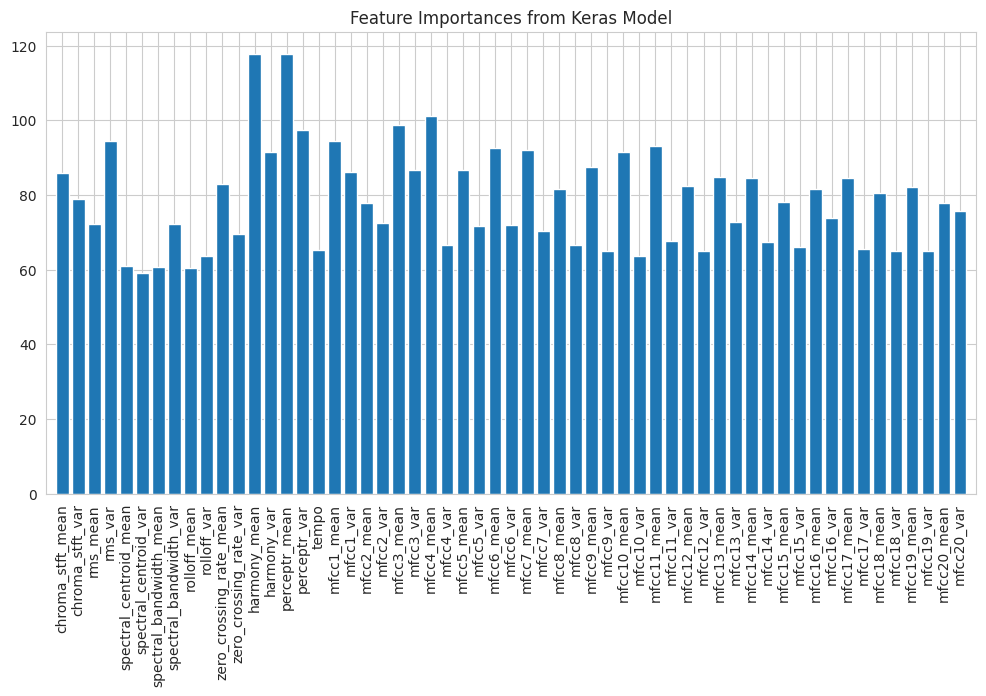

In [ ]:
# 특성 중요도 계산을 위한 가중치 추출
weights = model_4.layers[0].get_weights()[0]
feature_importances = np.abs(weights).sum(axis=1)

# 중요도 시각화
plt.figure(figsize=(12, 6))
plt.title("Feature Importances from Keras Model")
plt.bar(range(X_test.shape[1]), feature_importances, align="center")
plt.xticks(range(X_test.shape[1]), X_test.columns, rotation=90)
plt.xlim([-1, X_test.shape[1]])
plt.show()

In [ ]:
# Load the additional data with filename, artist, and title
df_metadata = pd.read_csv('/content/drive/MyDrive/SoundMap/data/MusicData_GTZAN/names_dataframe.csv')  # replace with the actual path

# # df의 filename에서 숫자와 소수점 뒤에 오는 부분 제거
# df['filename_base'] = df['filename'].apply(lambda x: '.'.join(x.split('.')[:2]) + '.wav')

# 두 데이터프레임 병합
df_merged = pd.merge(df, df_metadata[['filename', 'Artist', 'Title']], left_on='filename', right_on='filename', how='left')

# # 필요 없는 중간 컬럼 제거
# df_merged.drop(columns=['filename_base'], inplace=True)

# 병합 결과 확인
df_merged.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc17_var  \
0              2002.449060            85882.761315  ...   36.524071   
1              2039.036516           213843.755497  ...   60.314529   
2              1747.702312            76254.192257  ...   47.639427   
3              1596.412872           166441.494769  ...   50.206673   
4              1748.172116            88445.209036  ...   75.269707   

   mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  \
0    -0.408979   41.597103    -2.303523   55.062923     1.221291   46.936035   
1     0.295073   48.120598    -0.283518   51.106190     0.531217   45.786282   
2    -1.816407   52.382141    -3.439720   46.639660    -2.231258   30.573025   
3     0.636965   37.319130    -0.619121   37.259739    -3.407448   31.949339   
4    -0.916874   53.613918    -4.404827   62.910812   -11.703234   55.195160   

   label            Artist                                  Title  
0  blues   John Lee Hooker   One Bourbon, One Scotch And One Beer  
1  blues   John Lee Hooker               I'm In The Mood For Love  
2  blues   John Lee Hooker              Think Twice Before You Go  
3  blues   John Lee Hooker               I'm Bad Like Jesse James  
4  blues   John Lee Hooker                                    NaN  

[5 rows x 62 columns]

In [ ]:
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 13.9 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# Spotify API 연동 설정
client_credentials_manager = SpotifyClientCredentials(client_id='984dd3fad9584a5baa1de2519bf28ace', client_secret='0933302b614341ed92b5130d014a11ec')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# 곡 검색 및 오디오 특성 추출 함수
def get_spotify_features(title):
    if pd.isna(title):  # Title이 결측치인 경우 pass
        return None
    try:
        result = sp.search(q=title, type='track', limit=1)
        if result['tracks']['items']:
            track_id = result['tracks']['items'][0]['id']
            features = sp.audio_features(track_id)[0]
            return features
    except Exception as e:
        print(f"Error retrieving data for {title}: {e}")
        return None

# Spotify 특성 가져오기
df_merged['spotify_features'] = df_merged['Title'].apply(get_spotify_features)

# Spotify 특성을 JSON 형태로부터 각 컬럼으로 분리
spotify_features_df = pd.json_normalize(df_merged['spotify_features'])

# GTZAN 데이터프레임과 병합
df_merged = pd.concat([df_merged, spotify_features_df], axis=1)

# 결과 확인
df_merged.head()


filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  liveness  valence  \
0              2002.449060            85882.761315  ...    0.7950    0.874   
1              2039.036516           213843.755497  ...    0.0967    0.177   
2              1747.702312            76254.192257  ...    0.1480    0.968   
3              1596.412872           166441.494769  ...    0.7290    0.614   
4              1748.172116            88445.209036  ...       NaN      NaN   

     tempo            type                      id  \
0  111.636  audio_features  7DBFsVZd1d3sH73ti20b17   
1  123.341  audio_features  6crfO56bDm0RjpctUuGs5X   
2  158.361  audio_features  2IV2NdDBpCUhKmmIT841Po   
3  192.076  audio_features  5VmHzbvhPS6nCfO7NZiVBq   
4      NaN             NaN                     NaN   

                                    uri  \
0  spotify:track:7DBFsVZd1d3sH73ti20b17   
1  spotify:track:6crfO56bDm0RjpctUuGs5X   
2  spotify:track:2IV2NdDBpCUhKmmIT841Po   
3  spotify:track:5VmHzbvhPS6nCfO7NZiVBq   
4                                   NaN   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/7DBFsVZd1d3s...   
1  https://api.spotify.com/v1/tracks/6crfO56bDm0R...   
2  https://api.spotify.com/v1/tracks/2IV2NdDBpCUh...   
3  https://api.spotify.com/v1/tracks/5VmHzbvhPS6n...   
4                                                NaN   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/7DBF...     266440.0   
1  https://api.spotify.com/v1/audio-analysis/6crf...     149827.0   
2  https://api.spotify.com/v1/audio-analysis/2IV2...     123800.0   
3  https://api.spotify.com/v1/audio-analysis/5VmH...     331493.0   
4                                                NaN          NaN   

   time_signature  
0             4.0  
1             4.0  
2             4.0  
3             3.0  
4             NaN  

[5 rows x 81 columns]

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [ ]:
df_merged.to_csv('/content/drive/MyDrive/SoundMap/data/MusicData_GTZAN/GTZAN_Spotify_merged.csv')

<Axes: >

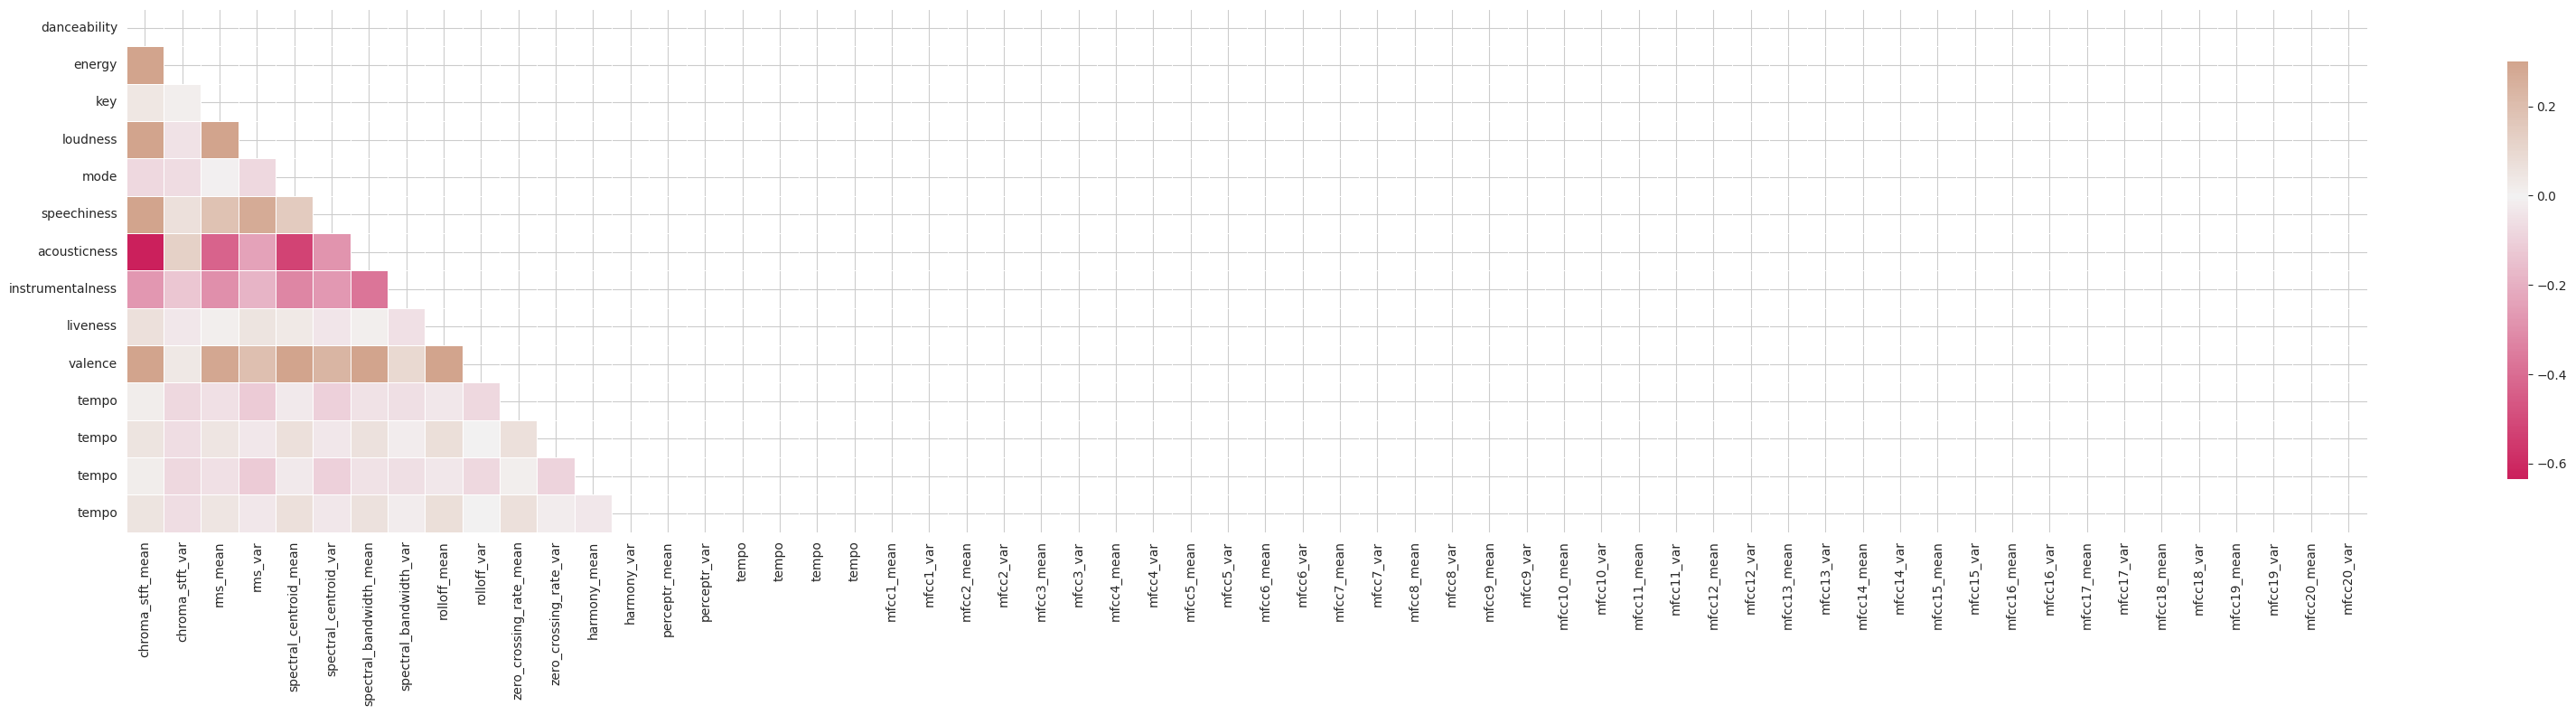

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 2~58번째 컬럼과 63~73번째 컬럼을 선택
cols_2_58 = df_merged.columns[2:59]
cols_63_73 = df_merged.columns[63:74]

# 두 그룹의 숫자형 데이터만 추출
df_group_1 = df_merged[cols_2_58]
df_group_2 = df_merged[cols_63_73]

# 두 그룹을 하나의 DataFrame으로 결합
df_combined = pd.concat([df_group_1, df_group_2], axis=1)

# 상관관계 계산
corr_matrix = df_combined.corr().loc[cols_63_73, cols_2_58]

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype='bool'))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 12));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
df_3sec = pd.read_csv('/content/drive/MyDrive/SoundMap/data/MusicData_GTZAN/features_3_sec.csv')
# shuffle samples
df_3sec_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)
# remove irrelevant columns
df_3sec_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
df_3sec_y = df_shuffle.pop('label')
df_3sec_X = df_shuffle

# Load the additional data with filename, artist, and title
df_metadata = pd.read_csv('/content/drive/MyDrive/SoundMap/data/MusicData_GTZAN/names_dataframe.csv')  # replace with the actual path

# # df의 filename에서 숫자와 소수점 뒤에 오는 부분 제거
df['filename_base'] = df['filename'].apply(lambda x: '.'.join(x.split('.')[:2]) + '.wav')

# 두 데이터프레임 병합
df_merged = pd.merge(df_3sec, df_metadata[['filename', 'Artist', 'Title']], left_on='filename', right_on='filename', how='left')

# # 필요 없는 중간 컬럼 제거
df_merged.drop(columns=['filename_base'], inplace=True)

# 병합 결과 확인
df_merged.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')